In [1]:
import pandas as pd
import statsmodels.api as sm

In [2]:
model_df = pd.read_csv("../Raw Data/ModelDB grp by.csv").dropna()

In [3]:
model_df

,Project Name,YYYYQQ,covid,psf,dpsf,dpsf%,years left,vol,NearMRT,Schools,PPI,D PPI,D PPI %
0,CAMELOT BY-THE-WATER,2000Q1,0,726.000000,-1.833333,0.002514,95,6,1,0,98.5,3.4,0.035752
1,CAMELOT BY-THE-WATER,2000Q2,0,759.913043,3.304348,0.007746,95,23,1,0,100.4,1.9,0.019289
2,CAMELOT BY-THE-WATER,2000Q3,0,795.000000,0.400000,0.001334,95,5,1,0,97.7,-2.7,-0.026892
3,CAMELOT BY-THE-WATER,2000Q4,0,779.571429,-0.285714,0.000070,95,7,1,0,94.2,-3.5,-0.035824
4,CAMELOT BY-THE-WATER,2001Q1,0,813.750000,5.250000,0.012331,94,4,1,0,90.0,-4.2,-0.044586
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,WATER PLACE,2021Q4,1,1343.000000,-76.500000,-0.053003,76,2,1,0,168.4,8.5,0.053158
1125,WATER PLACE,2022Q1,1,1437.875000,34.250000,0.028416,75,8,1,0,167.9,-0.5,-0.002969
1126,WATER PLACE,2022Q2,1,1517.400000,13.000000,0.011375,75,5,1,0,173.9,6.0,0.035736
1127,WATER PLACE,2022Q3,1,1569.666667,-0.666667,-0.000232,75,3,1,0,181.6,7.7,0.044278


In [4]:
condos = model_df["Project Name"].unique()

In [5]:
condos

array(['CAMELOT BY-THE-WATER', 'CASUARINA COVE', 'COSTA RHU',
       "COTE D'AZUR", 'DUNMAN VIEW', 'EAST BAY GARDENS',
       'KATONG PARK TOWERS', 'LAGOON VIEW', 'LAGUNA PARK',
       'LEGENDA AT JOO CHIAT', 'MANDARIN GARDENS', 'NEPTUNE COURT',
       'PEBBLE BAY', 'RIVEREDGE', 'ROXY SQUARE', 'SANCTUARY GREEN',
       'SEASIDE PARK', 'SEASIDE RESIDENCES', 'SILVERSEA',
       'TANJONG RIA CONDOMINIUM', 'THE RED HOUSE', 'THE SHORE RESIDENCES',
       'VILLA MARINA', 'WATER PLACE'], dtype=object)

In [6]:
condo_df = model_df.loc[model_df["Project Name"] == condos[1]].dropna()

In [7]:
condo_df

,Project Name,YYYYQQ,covid,psf,dpsf,dpsf%,years left,vol,NearMRT,Schools,PPI,D PPI,D PPI %
56,CASUARINA COVE,1995Q3,0,766.428571,3.571429,0.010391,97,7,1,0,97.7,0.9,0.009298
57,CASUARINA COVE,1995Q4,0,715.200000,-1.600000,0.003136,97,30,1,0,105.5,7.8,0.079836
58,CASUARINA COVE,1996Q1,0,735.750000,3.875000,0.013278,96,16,1,0,110.8,5.3,0.050237
59,CASUARINA COVE,1996Q2,0,821.111111,6.777778,0.014181,96,9,1,0,122.2,11.4,0.102888
60,CASUARINA COVE,1996Q3,0,870.000000,18.000000,0.021127,96,1,1,0,119.9,-2.3,-0.018822
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,CASUARINA COVE,2021Q3,1,1404.000000,104.000000,0.079882,71,2,1,0,159.9,1.1,0.006927
127,CASUARINA COVE,2021Q4,1,1377.500000,-11.500000,-0.003486,71,2,1,0,168.4,8.5,0.053158
128,CASUARINA COVE,2022Q1,1,1379.000000,-58.000000,-0.040362,70,1,1,0,167.9,-0.5,-0.002969
129,CASUARINA COVE,2022Q3,1,1460.000000,81.000000,0.058738,70,1,1,0,181.6,7.7,0.044278


In [25]:
X = condo_df[["PPI","vol"]]      #, "NearMRT", "Schools", "years left"]]
y = condo_df["psf"]

In [26]:
X = sm.add_constant(X)

C:\Users\ACER\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
model = sm.OLS(y, X).fit()

In [28]:
print(model.rsquared_adj)

0.9057679105318353


In [29]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    psf   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     356.6
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           4.39e-38
Time:                        14:30:07   Log-Likelihood:                -440.66
No. Observations:                  75   AIC:                             887.3
Df Residuals:                      72   BIC:                             894.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -223.5620     45.167     -4.950      0.0

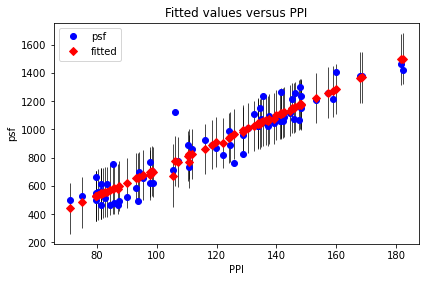

In [30]:
fig = sm.graphics.plot_fit(model, "PPI")
fig.tight_layout(pad=1.0)

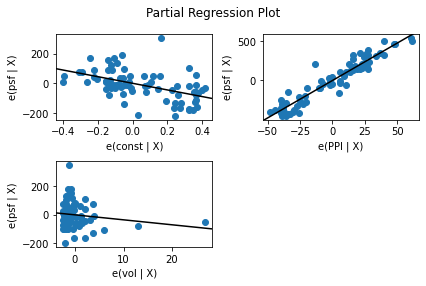

In [31]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)